In [1]:
## Import required packages
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os

In [2]:
#versions of the packages
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.18.5
1.0.5
2.2.0


In [3]:
# Listing different files in the directory
os.listdir('/content/drive/My Drive/detection_of_ships')

['shipsnet.json', 'shipsnet', 'scenes']

In [4]:
# Checking number of images in each folder respectively
print(len(os.listdir('/content/drive/My Drive/detection_of_ships/shipsnet/shipsimg')))
print(len(os.listdir('/content/drive/My Drive/detection_of_ships/scenes/scenesimg')))

4000
8


In [5]:
# Creating multiple directories
base_dir="/content/drive/My Drive/detection_of_ships"
ships_dir=os.path.join(base_dir,'shipsnet') 
scenes_dir=os.path.join(base_dir,'scenes') 
ships_imgs=os.path.join(ships_dir,'shipsimg')  #Directory with ships pictures
scenes_imgs=os.path.join(scenes_dir,'scenesimg')  #Directory with different ship-scenes images

In [6]:
#Dispalying Random Images
ships_images = os.listdir(ships_imgs)
ships_images[:5]

['1__20170901_181520_0e14__-122.36740002724083_37.80182586116483.png',
 '1__20170903_181304_1041__-122.32785024812625_37.73627990920489.png',
 '1__20170901_181520_0e14__-122.35121081280293_37.74752401629368.png',
 '1__20170830_181004_0f4e__-122.34726997279913_37.738714439896754.png',
 '1__20170905_181214_0f12__-122.3355516183776_37.758387726251996.png']

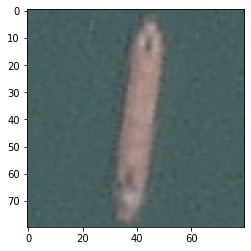

In [7]:
plt.imshow(plt.imread(ships_imgs+'/1__20170901_181520_0e14__-122.35121081280293_37.74752401629368.png'))

In [8]:
#Loading json file
with open('/content/drive/My Drive/detection_of_ships/shipsnet.json') as f: #open() function is used to read the json file. 
  DS=json.load(f) #The file is parsed using json.load() method.

In [9]:
# converting the data in 'shipsnet.json' file into a dataframe.
ships = pd.DataFrame(DS) #A pandas dataframe is created to analyze the data
ships.head()

data  ...             scene_ids
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...  ...  20180708_180909_0f47
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...  ...  20170705_180816_103e
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...  ...  20180712_211331_0f06
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...  ...  20170609_180756_103a
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...  ...  20170515_180653_1007

[5 rows x 4 columns]

In [10]:
x=np.array(DS['data']).astype('int64')
y=np.array(DS['labels']).astype('int64')
print(x.shape) #Dimensions of 'x' array
print(y.shape) #Dimensions of 'y' array

(4000, 19200)
(4000,)


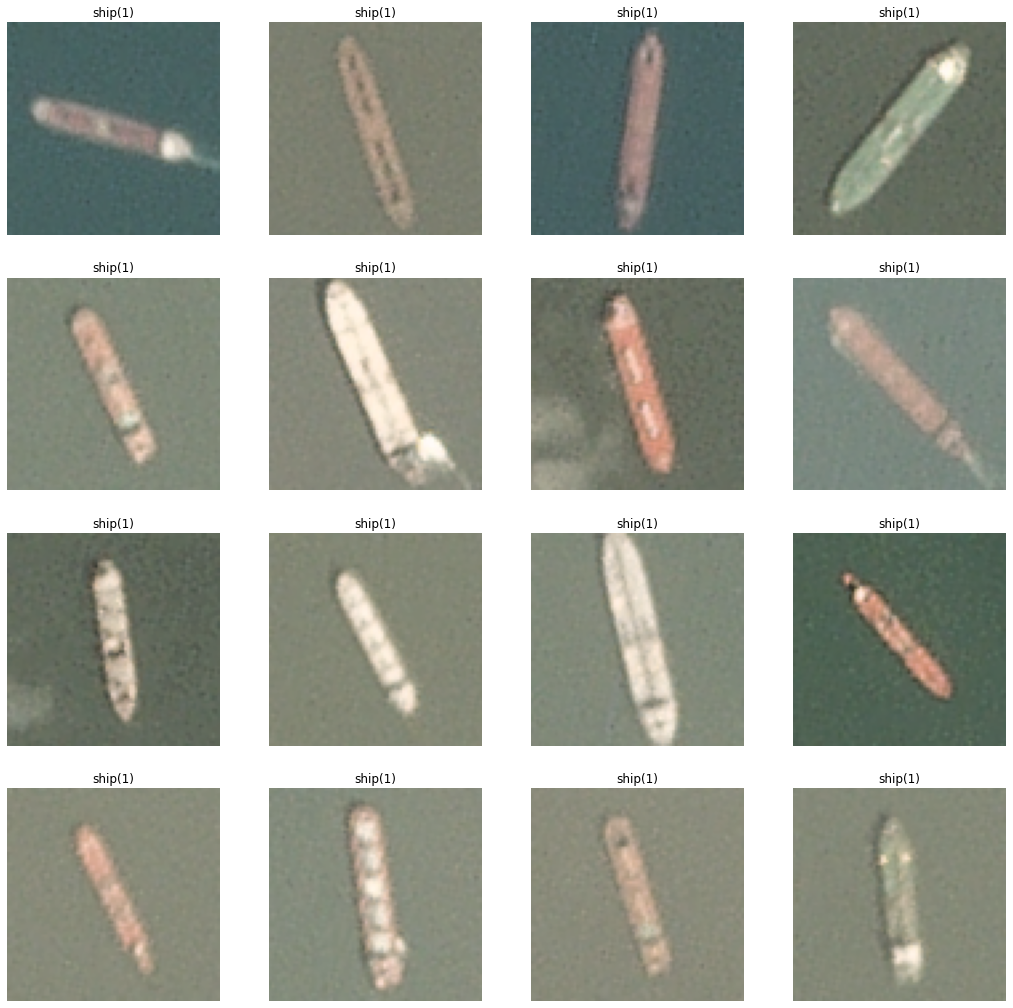

In [11]:
#Dispalying random images from ships_images
plt.figure(figsize=(18,18))
j=1 
for i in range(16):
  img=plt.imread(os.path.join(ships_imgs,ships_images[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  #plt.title(img.shape)
  plt.title('{}({})'.format("ship" if y[i]==1 else " No ship",y[i]))
  plt.axis('off')
  j+=1

In [12]:
#printing x array
x

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]])

In [13]:
#printing y array
y

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
#reshaping the model
x=x.reshape([-1,3,80,80]).transpose([0,2,3,1])
x.shape

(4000, 80, 80, 3)

In [15]:
#scaling the model
x_scale = x / 255 

## BUILD THE MODEL

In [16]:
#importing required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [17]:
model = Sequential()
#add a convolutional layer followed by maxpooling
model.add(Conv2D(16,3, padding='same', activation='relu' , input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#add a convolutional layer followed by maxpooling
model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#add a convolutional layer followed by maxpooling
model.add(Conv2D(64,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#convert the featuremap into 1D array
model.add(Flatten())
#Fully connected layer with 512 neurons
model.add(Dense(512, activation='relu'))
#Final output layer
model.add(Dense(1, activation='sigmoid'))
#summary for the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       7

## COMPILING THE MODEL

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) 

## TRAIN THE MODEL

In [19]:
history = model.fit(x_scale,y,epochs=15,batch_size=32,validation_split=0.2) 

Epoch 1/15
100/100 [==============================] - 1s 11ms/step - loss: 0.2772 - accuracy: 0.8841 - val_loss: 0.3606 - val_accuracy: 0.8338
Epoch 2/15
100/100 [==============================] - 1s 8ms/step - loss: 0.1354 - accuracy: 0.9509 - val_loss: 0.4537 - val_accuracy: 0.7812
Epoch 3/15
100/100 [==============================] - 1s 8ms/step - loss: 0.0878 - accuracy: 0.9684 - val_loss: 0.2099 - val_accuracy: 0.9000
Epoch 4/15
100/100 [==============================] - 1s 8ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.1772 - val_accuracy: 0.9275
Epoch 5/15
100/100 [==============================] - 1s 8ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0803 - val_accuracy: 0.9775
Epoch 6/15
100/100 [==============================] - 1s 8ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.2035 - val_accuracy: 0.9325
Epoch 7/15
100/100 [==============================] - 1s 8ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.1780 - val_accuracy: 0.9350
Epoch

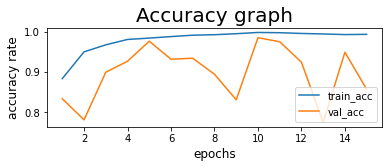

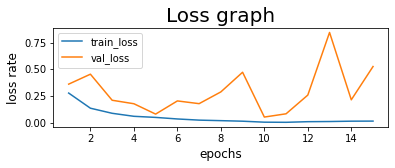

In [20]:
#Measuring Model Accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_accuracy,label='train_acc')
plt.plot(epochs,val_accuracy,label='val_acc')
plt.xlabel("epochs",fontsize=12)
plt.ylabel("accuracy rate",fontsize=12)
plt.title('Accuracy graph',fontsize=20)
plt.legend()
plt.show()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.xlabel("epochs",fontsize=12)
plt.ylabel("loss rate",fontsize=12)
plt.title('Loss graph',fontsize=20)
plt.legend()
plt.show()

In [38]:
from tensorflow.keras.preprocessing import image 
img=image.load_img('/content/drive/My Drive/detection_of_ships/shipsnet/shipsimg/1__20180205_181811_1030__-122.39782230108867_37.798740586411384.png') 
print(type(img)) 
img=tf.keras.preprocessing.image.img_to_array(img) 
print(img.shape)
print(type(img))
img=tf.image.resize(img,(80,80)) 
img=img/255 
print(img.shape)
img=np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.PngImagePlugin.PngImageFile'>
(80, 80, 3)
<class 'numpy.ndarray'>
(80, 80, 3)
(1, 80, 80, 3)


In [29]:
#Image Prediction
model.predict(img)
# if the predicted value is '1' or near to '1' then the image contains a ship or 
# else if it is '0' or near to '0' then the image doesn't contain a ship in it.

array([[0.99999857]], dtype=float32)